# Analyzing the lyrics of the top-10 Kanye West songs
Sources:

https://www.timeout.com/music/best-kanye-west-songs - songs ranking

https://www.lyrics.com/lyric/30984633/Kanye+West - songs lyrics

In [3]:
import findspark
findspark.init()

In [20]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [37]:
#Initialing spark
spark=SparkSession.builder\
    .master("local[*]")\
    .appName("CounterOfWords")\
    .getOrCreate()

# Importing and processing data

In [7]:
text = spark.sparkContext.textFile(r"D:\_HSE\1 Course\1_3\Research sem\input_data\songs_lyrics\song1.txt," + 
                                   r"D:\_HSE\1 Course\1_3\Research sem\input_data\songs_lyrics\song2.txt,"+
                                  r"D:\_HSE\1 Course\1_3\Research sem\input_data\songs_lyrics\song3.txt,"+
                                    r"D:\_HSE\1 Course\1_3\Research sem\input_data\songs_lyrics\song4.txt,"+
                                  r"D:\_HSE\1 Course\1_3\Research sem\input_data\songs_lyrics\song5.txt,"+
                                  r"D:\_HSE\1 Course\1_3\Research sem\input_data\songs_lyrics\song6.txt,"+
                                  r"D:\_HSE\1 Course\1_3\Research sem\input_data\songs_lyrics\song7.txt,"+
                                  r"D:\_HSE\1 Course\1_3\Research sem\input_data\songs_lyrics\song8.txt,"+
                                  r"D:\_HSE\1 Course\1_3\Research sem\input_data\songs_lyrics\song9.txt,"+
                                  r"D:\_HSE\1 Course\1_3\Research sem\input_data\songs_lyrics\song10.txt")


In [8]:
def lower_clean_str(x):
  punc='!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~-'
  lowercased_str = x.lower()
  for ch in punc:
    lowercased_str = lowercased_str.replace(ch, '')
  return lowercased_str

In [11]:
text_cleaned = text.map(lower_clean_str)


In [12]:
text_count = text_cleaned.flatMap(lambda x: x.split(' '))\
                .map(lambda x: (x, 1))\
                .reduceByKey(lambda x, y: x+y)

In [42]:
df = text_count.toDF()
df1 = df.toPandas()

In [32]:
df1 = df1.rename(columns={'_1':'word', '_2':'count'})
prepositions = ['the', 'a', 'to', 'and', 'in', 'it', 'im', 'of', 'up', 'get', 'is']
df1 = df1[~df1['word'].isin(prepositions)]
df_final = df1.sort_values('count', ascending=False).head(10)
df_final

,word,count
432,i,225
122,you,124
7,,84
320,my,69
558,me,65
551,all,53
745,your,51
340,baby,48
901,she,42
823,know,41


## Data visualization
I used to use "wordcloud", but it doesn't work, unfortunatelly

<AxesSubplot:xlabel='word', ylabel='count'>

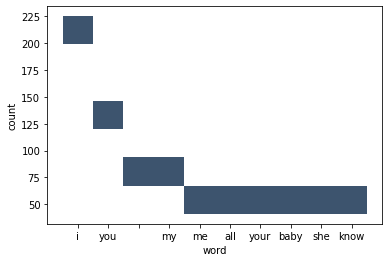

In [36]:
df_viz = sns.load_dataset('tips')
sns.histplot(x = "word", y = "count", data = df_final)

In [40]:
df1.to_csv(r'D:\_HSE\1 Course\1_3\Research sem\output_data\data-out.csv', index = False)